In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
sns.set()

In [73]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [75]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

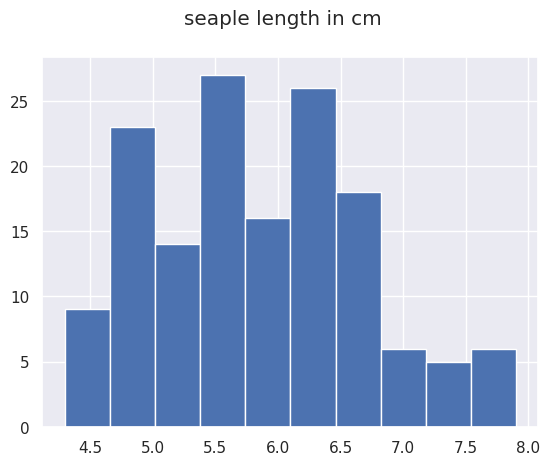

In [76]:
df['SepalLengthCm'].hist()
plt.suptitle("seaple length in cm")
plt.show()

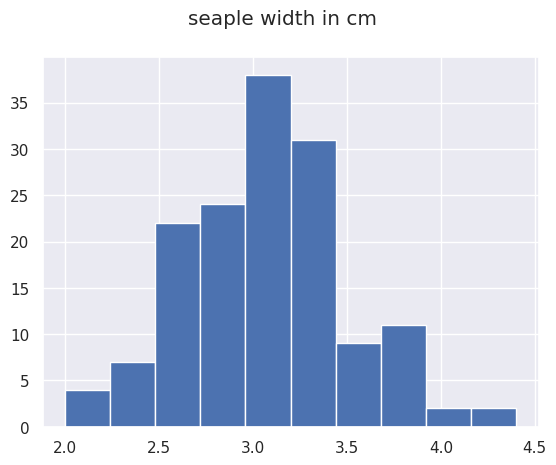

In [77]:
df['SepalWidthCm'].hist()
plt.suptitle("seaple width in cm")
plt.show()

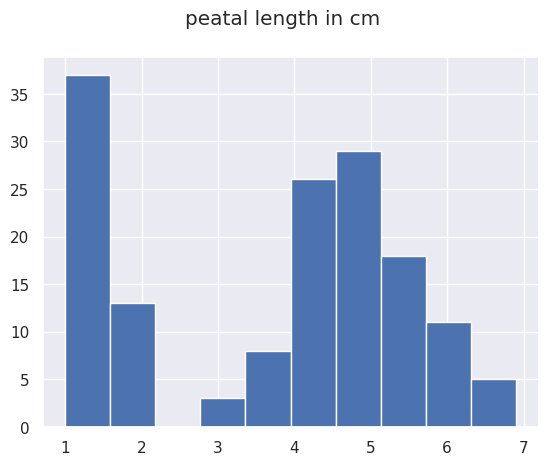

In [78]:
df['PetalLengthCm'].hist()
plt.suptitle("peatal length in cm")
plt.show()

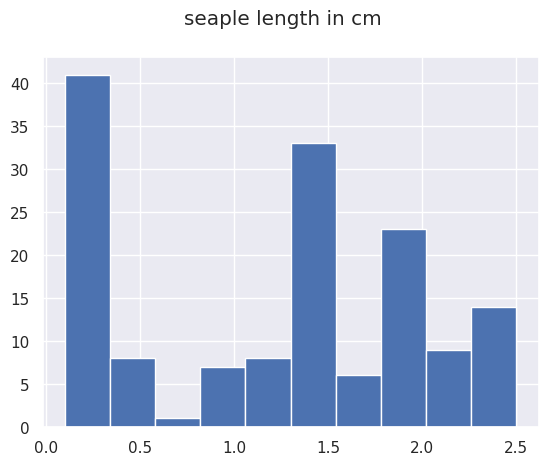

In [79]:
df['PetalWidthCm'].hist()
plt.suptitle("seaple length in cm")
plt.show()

In [80]:
# df['target'] = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# df.sample(5)

In [81]:
# sns.relplot(x='SepalLengthCm', y='target', hue='Species', data=df)

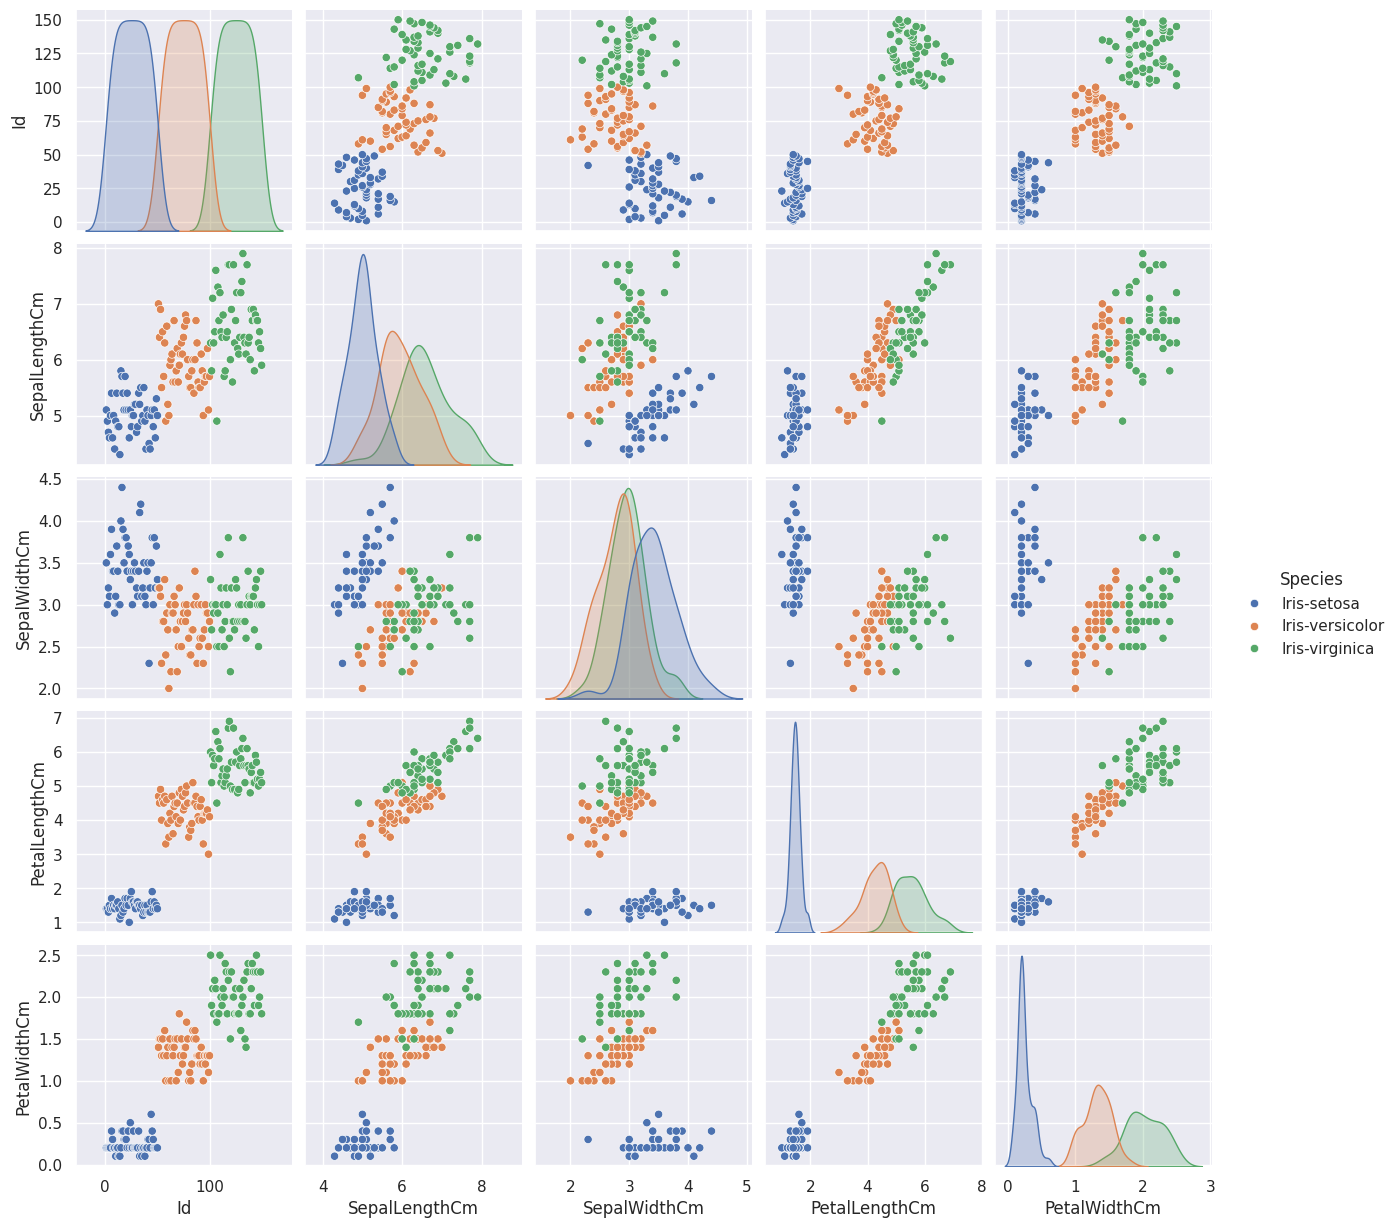

In [82]:
sns.pairplot(df, hue='Species')

In [83]:
df = df.drop(columns=['Id'])

In [84]:
X = df.drop('Species', axis=1)
y = df['Species']


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [86]:
X_test.shape, y_test.shape , X_test.shape , y_test.shape

((30, 4), (30,), (30, 4), (30,))

In [88]:
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [91]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

In [92]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [100]:
test_samples = pd.DataFrame(
    [
        [5.1, 3.5, 1.4, 0.2],  # Setosa
        [4.9, 3.0, 1.4, 0.2],  # Setosa
        [5.4, 3.9, 1.7, 0.4],  # Setosa
        [6.0, 2.9, 4.5, 1.5],  # Versicolor
        [6.1, 2.8, 4.7, 1.2],  # Versicolor
        [5.8, 2.7, 4.1, 1.0],  # Versicolor
        [6.5, 3.0, 5.2, 2.0],  # Virginica
        [6.3, 2.9, 5.6, 1.8],  # Virginica
        [7.1, 3.0, 5.9, 2.1],  # Virginica
        [6.9, 3.1, 5.4, 2.1],  # Virginica
    ],
    columns=X.columns
)

model.predict(test_samples)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)